In [1]:
%reset

In [2]:
import numpy as np
import pandas as pd
import os
import json_module, dirs_module
import txt_module
import importlib
import matplotlib.pyplot as plt


plt.rcParams["figure.facecolor"] = "white"
plt.rcParams["figure.figsize"] = (20,7)

In [3]:
# constants
BIN_WIDTH = 25
ZERO_PADDING_MULTIPLE = 1
NUM_COEF_TO_SAVE = 31999

project_dir = 'D:/FINKI/40_diploma_thesis'

# calculating fft on data that can be used for training
data_dir = f'E:\\40_diploma_thesis\datasets_numpy_1S_OffsetHealthy01_OffsetDamaged05'

arrays_index = txt_module.read_list_from_txt(f'{project_dir}/data/datasets_numpy/index.txt')
arrays_index = [feature for feature in arrays_index if not feature.startswith('Temp')]
min_measurement_lengths = json_module.read_json(f'{project_dir}/metadata/min_measurement_lengths.json')

y_map = json_module.read_json(f'{project_dir}/metadata/y_map.json')

plots_dir = 'histogramed_wavelet_distribution'
import dirs_module
dirs_module.create_directory(plots_dir)

In [4]:
features_to_generate = [
    # 'Mech_4kHz_Data',
    # 'HostService_64kHz_Data',
    # 'Temp_1Hz_Data',
    # 'Mech_4kHz_force',
    # 'HostService_64kHz_phase_current_1',
    # 'HostService_64kHz_phase_current_2',
    # 'Mech_4kHz_speed',
    # 'Temp_1Hz_temp_2_bearing_module',
    # 'Mech_4kHz_torque',
    'HostService_64kHz_vibration_1'
]

healthy_train = ['K001','K002','K003']
real_damage_train = ['KA04','KA15','KA22','KA30','KB23','KB27','KI04','KI17']
artificial_damage_train = ['KA01','KA05','KA07','KI01','KI03']
train_bearing_codes = healthy_train + artificial_damage_train + real_damage_train

regimes = ['N09_M07_F10', 'N15_M07_F10', 'N15_M01_F10', 'N15_M07_F04']

In [5]:
all_bearing_codes = list()
for file in os.listdir(r'D:\FINKI\40_diploma_thesis\data\datasets_csv'):
    bearing_code = file.split('_')[3]
    if bearing_code not in all_bearing_codes:
        all_bearing_codes.append(bearing_code)


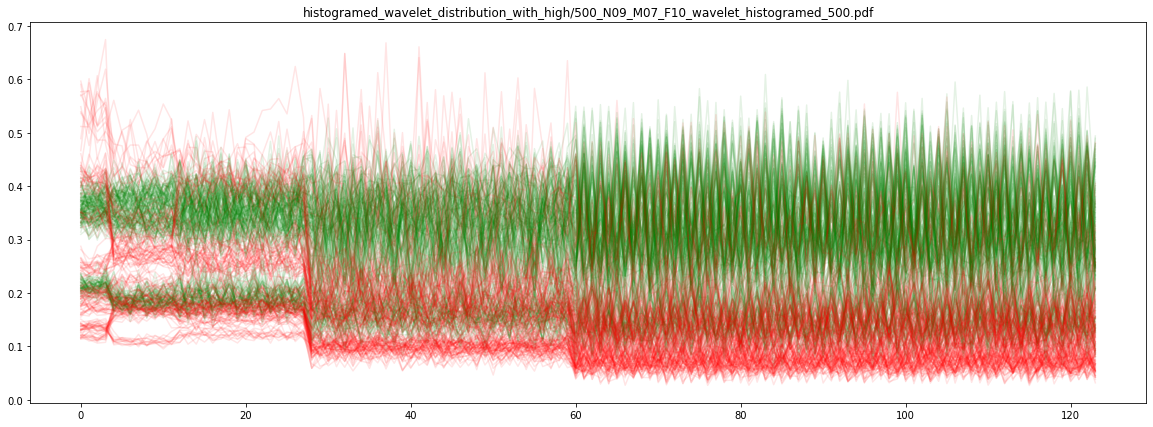

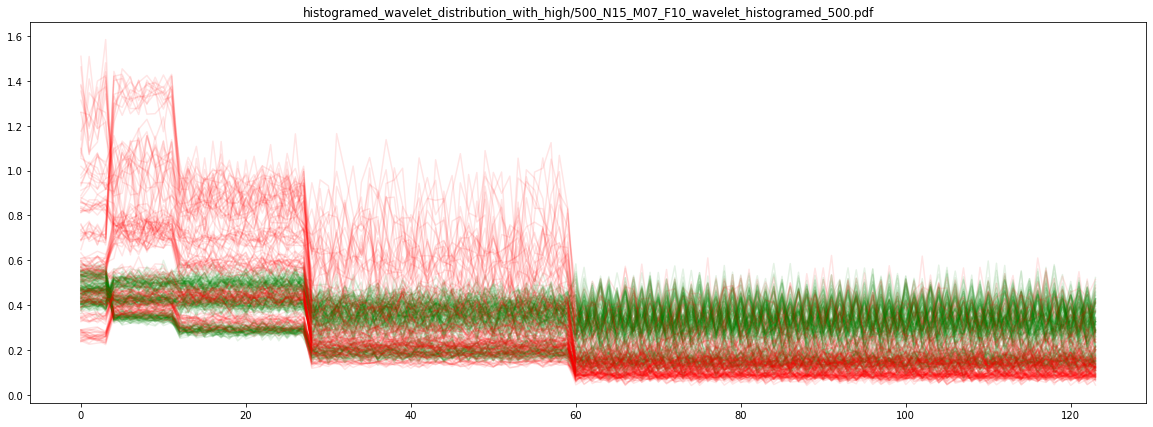

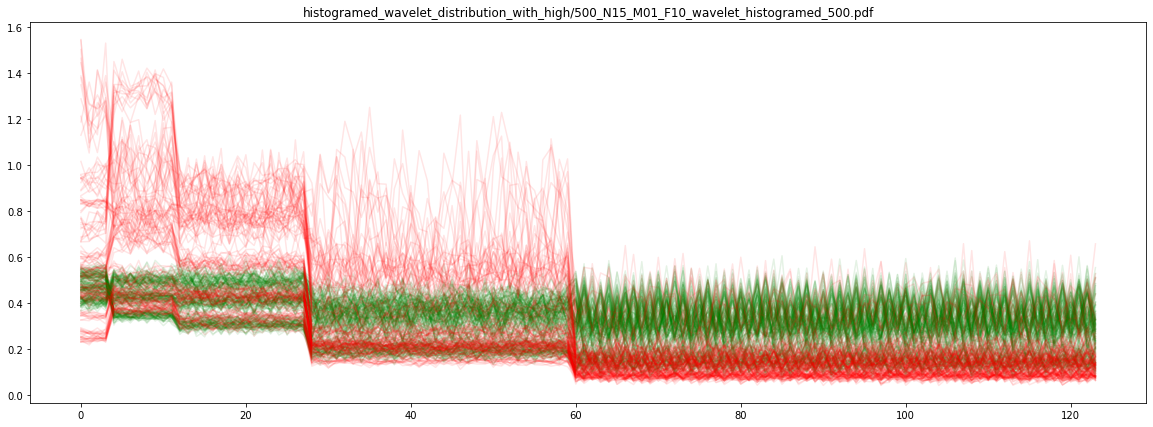

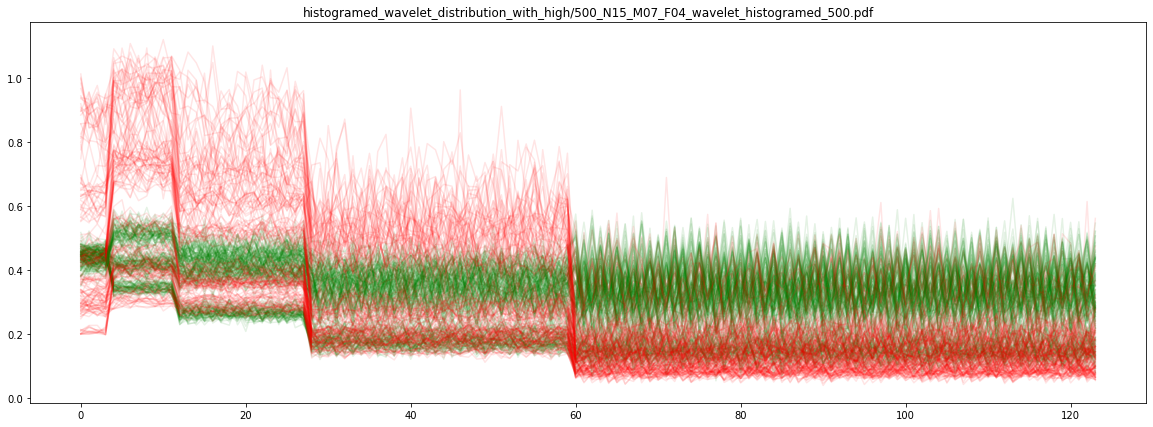

In [6]:
from pywt import wavedec
plots_dir = 'histogramed_wavelet_distribution_with_high'
import dirs_module
dirs_module.create_directory(plots_dir)


def histogram_sums(ordered_iterable, bin_width_):

    ordered_iterable = np.array(ordered_iterable)
    more_bins_to_create = True
    current_start_position = 0
    bin_sums = list()
    while more_bins_to_create:
        bin_sums.append(ordered_iterable[current_start_position:current_start_position+bin_width_].std())
        current_start_position += bin_width_

        if current_start_position + bin_width_ > len(ordered_iterable):
            more_bins_to_create = False

    return bin_sums


for bin_width in [500]:

    for feature in features_to_generate:
        # print(feature)
        feature_arrays_fft_per_bearing_code = dict()

        for regime in regimes:

            for bearing_code in all_bearing_codes:
                # print(bearing_code)
                if bearing_code not in train_bearing_codes: continue
                feature_arrays = list()
                feature_arrays_fft = list()

                for file in os.listdir(data_dir)[::10]:
                    if bearing_code not in file: continue
                    if regime not in file: continue
                    file_ndarray = np.load(f'{data_dir}/{file}', allow_pickle = True)
                    feature_index = arrays_index.index(feature)
                    feature_array = file_ndarray[feature_index].astype('float32')

                    levels = 5
                    features = list()
                    decomp = wavedec(feature_array, 'db2', level = levels)
                    for level in range(1,levels+1):
                        signal = decomp[level]
                        num_coeffs = len(signal)

                        level_bin_sums = histogram_sums(signal, bin_width)
                        features.extend(level_bin_sums)

                    feature_arrays_fft.append(features)

                feature_arrays_fft_per_bearing_code[bearing_code] = feature_arrays_fft
                for i in feature_arrays_fft_per_bearing_code[bearing_code]:
                    plt.plot(
                        np.arange(len(i)), i,
                        color = 'green' if bearing_code.startswith('K00') else 'red',
                        alpha = 0.1
                    )
            plt.title(f'{plots_dir}/{bin_width}_{regime}_wavelet_histogramed_{bin_width}.pdf')
            plt.savefig(f'{plots_dir}/{bin_width}_{regime}_wavelet_histogramed_{bin_width}.pdf')
            plt.show()


In [7]:
len(i)

124